In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib.request
import os
import seaborn as sns
red, blue, green, purple, orange = sns.color_palette('Set1', 5)

from scipy.integrate import odeint

def Re(α, β, μ, D):
    return α * β * D1 + (1-α) * β * D2

Equation system just for one city (e.g. Wuhan):
$$
\frac{dS}{dt} = - \beta \frac{S (I_1 + I_2)}{N}  \\
\frac{dE}{dt} = \beta \frac{S (I_1+I_2)}{N} - \frac{E}{Z} \\
\frac{dI_1}{dt} = \alpha \frac{E}{Z} - \frac{I_1}{D_1} \\
\frac{dI_2}{dt} = (1-\alpha)\frac{E}{Z} -  \frac{I_2}{D_2} \\
\frac{dR_1}{dt} = \frac{I_1}{D_1} \\
\frac{dR_2}{dt} = \frac{I_2}{D_2} \\
N = S + E + I_1 + I_2 + R_1 + R_2
$$

Variables:
- $S$ susceptible
- $E$ exposed
- $I_1$ infected without priming
- $I_2$ infected with priming
- $R_1$ recovered without priming
- $R_2$ recovered with priming
- $N$ total population size (constant)

Parameters: 
- average latency period $2 \le Z \le 5$ days, uniform
- average duration of infection without priming  $2 \le D_1 \le 5$ days, uniform
- average duration of infection with priming  $2 \le D_2 \le 5$ days, uniform
- fraction of primed individuals infections $0 \le \alpha \le 1$, uniform
- transmission rate due to infected individuals $0.6 \le \beta \le 1.5$, uniform

In [2]:
def ode(y, t, Z, D1, D2, β, α):
    S, E, I1, I2, R1, R2 = y
    S = max(0, S)    
    ode_ = [
        -β * S * (I1+I2) / N,        # dS/dt
         β * S * (I1+I2) / N - E/Z,  # dE/dt
         (1-α) * E/Z  - I1/D1,       # dI1/dt
            α  * E/Z  - I2/D2,       # dI2/dt
        I1/D1,                       # dR1/dt
        I2/D2                        # dR2/dt
    ]
    if (S==0): print('S=0', ode_[1])
    return ode_

In [3]:
β = 1.1
α = 0.1
Z = 3.77
D1 = D2 = 3.45

E0 = 500
N = 7000000
t = np.arange(0, 90, 1)

In [4]:
def simulate(Z, D1, D2, β, α):
    y0 = [N-E0, E0, 0, 0, 0, 0]
    y = odeint(ode, y0, t, args=(Z, D1, D2, β, α)).T
    S, E, I1, I2, R1, R2 = y
    S = np.maximum(0, S)
    return S, E, I1, I2, R1, R2
    
S, E, I1, I2, R1, R2 = simulate(Z, D1, D2, β, α)

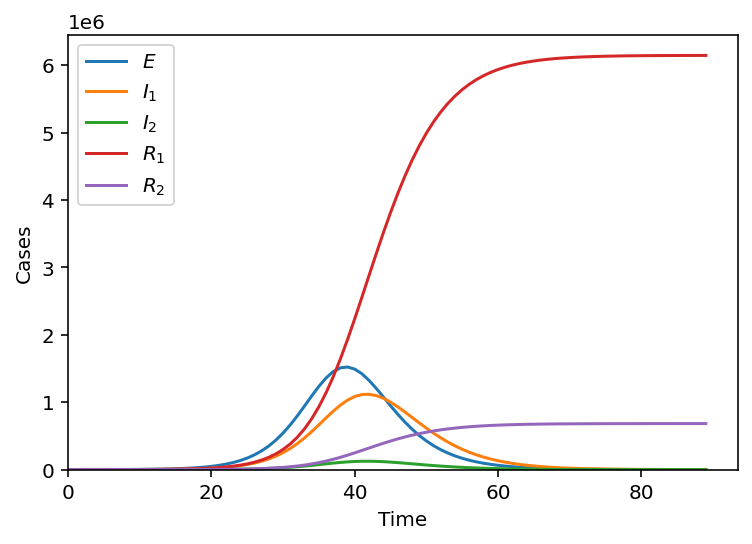

In [6]:
plt.plot(t, E, label='$E$')
plt.plot(t, I1, label='$I_1$')
plt.plot(t, I2, label='$I_2$')
plt.plot(t, R1, label='$R_1$')
plt.plot(t, R2, label='$R_2$')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.xlim(0, None)
plt.ylim(0, None)
plt.legend();